In [1]:
from simscity import *

import altair as alt
import pandas as pd
import numpy as np
import umap

In [2]:
n_classes = 5
n_latent = 6
n_cells = 5000
n_features = 1000
n_conditions = 8

scale = 5
sparsity = 0.8

In [3]:
programs = latent.gen_programs(n_latent, n_features, sparsity, scale)

classes = latent.gen_classes(n_latent, n_classes, sparsity, scale)

latent_exp, class_labels = latent.sample_classes(n_cells, classes)

expression = np.dot(latent_exp, programs)

u = umap.UMAP().fit_transform(expression)

/Users/james.webber/anaconda3/envs/simscity/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding 5 connected components using meta-embedding (experimental)
  n_components
/Users/james.webber/anaconda3/envs/simscity/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [4]:
umis = sequencing.umi_counts(np.exp(expression), lib_size=10000)

u2 = umap.UMAP().fit_transform(umis)

/Users/james.webber/anaconda3/envs/simscity/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding 2 connected components using meta-embedding (experimental)
  n_components


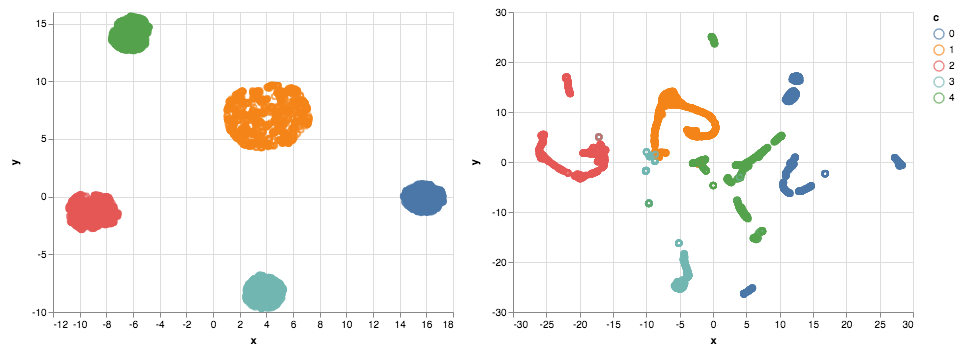

In [5]:
alt.hconcat(
    alt.Chart(
        data=pd.DataFrame({'x': u[:,0], 'y': u[:,1], 'c': class_labels})
    ).mark_point().encode(x='x:Q', y='y:Q', color='c:N'),
    alt.Chart(
        data=pd.DataFrame({'x': u2[:,0], 'y': u2[:,1], 'c': class_labels})
    ).mark_point().encode(x='x:Q', y='y:Q', color='c:N')
)